In [32]:
#!/usr/bin/env python
"""
Credit Card Fraud Detection
@Author : Lorien Riead
          Vinay Sharma
"""

import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler

#path = "E:/Vinay/OneDrive/PSU/AI570/Project/src/creditcardfrauddetection"
path = "I:/Lorien/OneDrive/Documents/Grad School/AI 570/Final Project/creditcard"
os.chdir(path)

This is the description of this dataset:

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [33]:
# Make sure the credictcard.csv file is in the same directory as this script
credit_cards = pd.read_csv("creditcard.csv",)

I am using the csv formatted data

In [34]:
credit_cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
credit_cards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can see that there are 284,807 entries in this data.

In [36]:
credit_cards.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

All the data are floats except one.

In [37]:
credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class is the int value.

In [38]:
credit_cards.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values.

Text(0.5, 0, 'Predicted label')

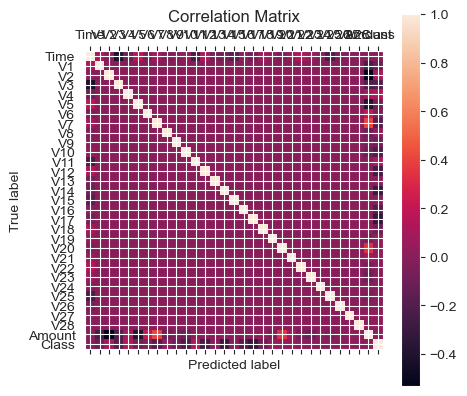

In [39]:
 # plot correlation matrix
plt.matshow(credit_cards.corr())
plt.title('Correlation Matrix', position = (0.5, 1.1))
plt.colorbar()
plt.xticks(range(31), list(credit_cards.columns))
plt.yticks(range(31), list(credit_cards.columns))
plt.ylabel('True label')
plt.xlabel('Predicted label')

None of the V values are correlated.  This data may be difficult to use while modeling.

<Axes: >

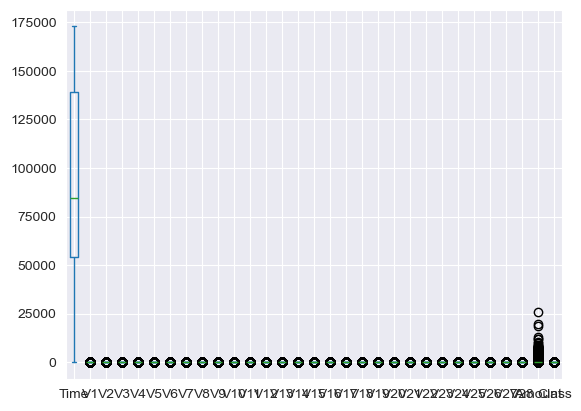

In [40]:
credit_cards.plot.box()

Now, we will split the dataset in two sections - test and train with 30-70 ratio.

In [41]:
features = [c for c in credit_cards.columns if c != 'Class']

X = credit_cards[features].values
y = credit_cards['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Scaling of the training and test data is a very important step before applying SMOTE to prevent data leakage and improve neural network training stability and convergence speed.

We will use StandardScaler to to normalize features so that each column has mean = 0 and standard deviation = 1

The features besides Amount and Time (V1 to V28) are generally normalized in the dataset. But since Amount and Time are't, so they might dominate.

We fit the scaler *only on the training data* to prevent data leakage. We then apply the same transformation to the test set using the parameters learned from the training data.



In [42]:
# Scale using only training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Since the original dataset is highly imbalanced with only about 0.17% of transactions are fraudulent it can cause the model to become biased toward predicting the majority (non-fraud) class.

SMOTE (Synthetic Minority Oversampling Technique) generates new synthetic samples for the minority class (fraud) by interpolating between existing minority samples and their nearest neighbors.

We apply SMOTE **only on the training data** (never on the test set) to avoid data leakage.

This step will give us a balanced training dataset that helps the model learn fraud patterns more effectively without being dominated by normal transactions.

In [43]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [44]:
print("Original training class distribution:", Counter(y_train))
print("Resampled training class distribution:", Counter(y_train_resampled))

Original training class distribution: Counter({0: 199020, 1: 344})
Resampled training class distribution: Counter({0: 199020, 1: 199020})


Using a k-nearest neighbors classification as a baseline.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_knn_pred = model_KNN.predict(X_test_scaled)


print("ROC AUC :", roc_auc_score(y_test, y_knn_pred))
print("PR  AUC:", average_precision_score(y_test, y_knn_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_knn_pred, zero_division=0, digits=3))

# Print accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_knn_pred))

ROC AUC : 0.9147433074084695
PR  AUC: 0.3949758860545758
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.998     0.999     85295
           1      0.475     0.831     0.604       148

    accuracy                          0.998     85443
   macro avg      0.737     0.915     0.802     85443
weighted avg      0.999     0.998     0.998     85443

Accuracy Score:  0.9981157028662383


**K-means Results Interpretation**:

ROC AUC = ~0.91 - The model we have can almost always rank fraudulant transactions above normal ones.

PR AUC = ~0.34 - This shows weak precision in the model.

Class 1 Recall = 0.83 → ~83 % of all frauds caught

Class 1 Precision = 0.475 → ~47 % of predicted frauds were actually frauds

Alternate implementation using LSTM with GRU for comparative analysis

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense

# Reshape the data
X_reshaped = X_train_resampled.reshape(X_train_resampled.shape[0], 1, X_train_resampled.shape[1])


model_gl = Sequential()
model_gl.add(LSTM(units=64, return_sequences=True))
model_gl.add(GRU(units=32))
model_gl.add(Dense(units=16, activation='relu'))
model_gl.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_gl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
history = model_gl.fit(X_reshaped, y_train_resampled,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9909 - loss: 0.0333 - val_accuracy: 0.9963 - val_loss: 0.0094
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9980 - val_loss: 0.0055
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 9.0341e-04
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 4.0048e-04
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9972 - val_loss: 0.0134
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9995 - loss: 0

In [48]:
model_gl.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 1, 64)          │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,821 (401.65 KB)

 Trainable params: 34,273 (133.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,548 (267.77 KB)

In [49]:
import numpy as np
from sklearn.metrics import classification_report

# First, reshape the test data the same way as training data
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# eval
probability_gl = model_gl.predict(X_test_reshaped, verbose=0).ravel()      # get predicted probabilities for test data

y_pred_gl = (probability_gl > 0.5).astype(int)  # Convert probabilities to binary predictions
print("ROC AUC :", roc_auc_score(y_test, probability_gl))
print("PR  AUC:", average_precision_score(y_test, probability_gl))
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gl, zero_division=0, digits=3))

# Print accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred_gl))


ROC AUC : 0.9213133116703079
PR  AUC: 0.7611752549673213

Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.999     0.999     85295
           1      0.620     0.770     0.687       148

    accuracy                          0.999     85443
   macro avg      0.810     0.885     0.843     85443
weighted avg      0.999     0.999     0.999     85443

Accuracy Score:  0.9987828142738434


**GRU LSTM Results Interpretation**:

ROC AUC = ~0.92 - The model we have can almost always rank fraudulant transactions above normal ones.

PR AUC = ~0.76 - This shows strong precision in the model we have now.

Class 1 Recall = 0.77 → ~77 % of all frauds caught

Class 1 Precision = 0.62 → ~62 % of predicted frauds were actually frauds

A Deep Neural Network (DNN) is an artificial intelligence architecture designed to learn complex patterns and relationships in data. It is essentially an expansion of a standard artificial neural network, distinguished by having multiple hidden layers between its input and output layers, which gives it "depth". 

**Structure**:
A DNN is made up of interconnected "neurons" organized into layers:

Input Layer: This is where raw data is fed into the network.
    
Hidden Layers: These are the intermediate layers where the actual processing happens. In a deep network, there are many of these layers. Each layer takes the output from the previous one, performs a calculation, and passes the result to the next layer. This hierarchical structure allows the network to learn features of increasing complexity.
    
Output Layer: This layer produces the final result, such as classification and prediction

**Early Stopping**:
As we train neural network for multiple epocs, early stopping monitiors the learning parameters (PR-AUC) to validate and make sure the model doesn't start memorizing training data instead of learning general patterns to prevent overfitting.
In this scenario, we will stop training the model model if we don't find improvement for 8 epocs and eventually restore the best weights observed while training.

In [50]:
def make_dnn(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),   # layer of 128 neurons with ReLU activation for complex patterns
        layers.BatchNormalization(),
        layers.Dropout(0.3),                    # dropout layer to prevent overfitting - 30% neurons dropped
        layers.Dense(64, activation='relu'),    # layer of 64 neurons with ReLU activation for more abstract patterns
        layers.BatchNormalization(),
        layers.Dropout(0.3),                   # dropout layer to prevent overfitting - 30% neurons dropped
        layers.Dense(1, activation='sigmoid')   # output layer with sigmoid activation for binary classification
    ])
    model.compile(optimizer=keras.optimizers.Adam(0.001),       # Adam optimizer with learning rate 0.001
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='roc'),               # ROC AUC metric 
                           keras.metrics.AUC(curve='PR', name='pr')])   # PR AUC metric
    return model

dnn = make_dnn(X_train_resampled.shape[1])                  # create DNN model with input dimension matching training data
es = keras.callbacks.EarlyStopping(
    patience=8,                                 # stop training if no improvement for 8 epochs
    restore_best_weights=True,                  # restore model weights from the epoch with the best validation metric
    monitor='val_pr',                           # monitor validation PR AUC for early stopping
    mode='max')                                 # maximize the monitored metric; higher is better

hist = dnn.fit(
        X_train_resampled,                      
        y_train_resampled, 
        epochs=100,                             # train for up to 100 epochs; might stop earlier due to early stopping
        batch_size=1024,                        # use batch size of 1024 samples for training
        validation_split=0.2,                   # use 20% of training data for validation
        callbacks=[es],                         # include early stopping callback
        verbose=0)

Now since we hae our trained model, lets try to run it against unseen test data. The output of this step is going to be possibilities between 0 and 1, predicting the probability that the supplied transaction is fraudlant (class=1) or not (class=0).
Once have the outcome of the probability matrix, we will bucket the probabilities into binary classes (>=0.5 = 1; <0.5 = 0).

ROC-AUC (Area under curve of Receiver Operating Characteristic) measures how well the model ranks frauds higher than non-frauds.

PR-AUC (Precision–Recall area under curve) focuses on minority class (fraud) and combines precision (how many predicted frauds are true frauds) and recall (how many real frauds were caught).

In [51]:
# eval
proba = dnn.predict(X_test_scaled, verbose=0).ravel()      # get predicted probabilities for test data
pred  = (proba >= 0.5).astype(int)                  # convert probabilities to binary predictions using 0.5 threshold
print("ROC AUC :", roc_auc_score(y_test, proba))
print("PR  AUC:", average_precision_score(y_test, proba))
print(classification_report(y_test, pred, digits=3))     # print detailed classification report

ROC AUC : 0.9714580002946849
PR  AUC: 0.7096808033424713
              precision    recall  f1-score   support

           0      1.000     0.992     0.996     85295
           1      0.160     0.845     0.270       148

    accuracy                          0.992     85443
   macro avg      0.580     0.918     0.633     85443
weighted avg      0.998     0.992     0.995     85443



**DNN Results Interpretation**:

ROC AUC = ~0.97 - The model we have can almost always rank fraudulant transactions above normal ones.

PR AUC = ~0.708 - This shows strong precision in the model we have now. 

Class 1 Recall = 0.845 → ~85 % of all frauds caught

Class 1 Precision = 0.169 → ~17 % of predicted frauds were actually frauds - This is expected, given the dataset has very less number of fraud transactions.



**Autoencoder**:

This step builds an **autoencoder** trained *only on normal transactions* to learn their feature distribution. After training, we measure how well the model reconstructs each transaction — high reconstruction error implies the sample deviates from learned normal patterns and may indicate fraud.

Although our supervised DNN already achieves excellent performance (ROC-AUC ≈ 0.97, PR-AUC ≈ 0.70), an autoencoder can still be valuable for:
- Detecting previously unseen fraud patterns (unsupervised anomaly detection)
- Serving as a complementary model in an ensemble

If labeled fraud data is available and your DNN performs strongly, this AE step is **optional**, but it’s insightful for understanding anomaly-based detection techniques.

In [52]:

# train only on normal class
Xn = credit_cards.loc[credit_cards.Class==0, features].values # normal transactions
Xt = credit_cards[features].values 
yt = credit_cards['Class'].values

scaler_ae = StandardScaler()
Xn_scale = scaler_ae.fit_transform(Xn)
Xt_scale = scaler_ae.transform(Xt)

input_dim = Xn_scale.shape[1]       
encoding_dim = 16  # tune

inp = keras.Input(shape=(input_dim,))               
x = layers.Dense(64, activation='relu')(inp)            # layer of 64 neurons with ReLU activation
x = layers.Dense(32, activation='relu')(x)              # layer of 32 neurons with ReLU activation

enc = layers.Dense(encoding_dim, activation='relu')(x)
x = layers.Dense(32, activation='relu')(enc)              # layer of 32 neurons with ReLU activation    
x = layers.Dense(64, activation='relu')(x)                # layer of 64 neurons with ReLU activation

out = layers.Dense(input_dim, activation='linear')(x)           # output layer with linear activation

ae_model = keras.Model(inp, out)                                      # autoencoder model
ae_model.compile(optimizer=keras.optimizers.Adam(0.001), loss='mse')  # compile autoencoder with Adam optimizer and MSE loss

es = keras.callbacks.EarlyStopping(
    patience=8,                                             # stop training if no improvement for 8 epochs
    restore_best_weights=True,                              # restore model weights from the epoch with the best validation metric  
    monitor='val_loss',                                     # monitor validation loss
    mode='min')

ae_model.fit(
    Xn_scale, 
    Xn_scale, 
    epochs=200, 
    batch_size=1024, 
    validation_split=0.2, 
    callbacks=[es], 
    verbose=0)

# reconstruction error
recon = ae_model.predict(Xt_scale, verbose=0)
mse = np.mean(np.square(Xt_scale - recon), axis=1)

# choose threshold: e.g., 99th percentile of normal-train errors
train_recon = ae_model.predict(Xn_scale, verbose=0)
thr = np.percentile(np.mean(np.square(Xn_scale - train_recon), axis=1), 99)

y_pred = (mse >= thr).astype(int)  # 1 = anomaly
print("ROC AUC :", roc_auc_score(yt, mse))
print("PR  AUC:", average_precision_score(yt, mse))
print(classification_report(yt, y_pred, digits=3))


ROC AUC : 0.9431742660901277
PR  AUC: 0.6587480666498581
              precision    recall  f1-score   support

           0      1.000     0.990     0.995    284315
           1      0.122     0.801     0.211       492

    accuracy                          0.990    284807
   macro avg      0.561     0.895     0.603    284807
weighted avg      0.998     0.990     0.993    284807



**Autoencoder Results Interpretation**

ROC-AUC = 0.94 - Excellent separation: the AE’s reconstruction error ranks most frauds higher than normals.

PR-AUC = 0.63 - Very strong for an unsupervised model on this dataset (baseline ≈ 0.0017).

Class 1 Recall = 0.81 - Catches ~81 % of frauds

Class 1 Precision = 0.12 - Only 12 % of alerts are real frauds but expected with this imbalance.



**Generative Adversarial Network (GAN)** is a neural network architecture which contains two models - Generator (G) and Discriminator (D). In this architecture the Generator uses syntetic data and learns the underlying structure of the real minority class and suppplies that to Discriminator whose job is to classify them as real or fake. GANs are powerful because they learn complex data distributions without explicitly modeling them.

Since we are working with a heavily imbalanced dataset with the minority class (fraud) percentage is very low, GAN can help us generate some synthetic data for frauds and help us get a model which can correctly classify the two classes. Unlike SMOTE, GAN not just interpolate the nearest neighbors, but it also captures non-linear structure. 

In [53]:
# We'll standardize features; keep only numeric (the Kaggle set is numeric already)
X = credit_cards[features].values.astype('float32')
y = credit_cards['Class'].values.astype('int32')


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.3,      # 30% test size
    random_state=42,    # random seed for reproducibility
    stratify=y
)

# scale using only training data
sc_gan = StandardScaler()
X_train = sc_gan.fit_transform(X_train)  # fit on train only
X_test  = sc_gan.transform(X_test)       # transform test data

In [54]:

# Prepare minority-only set
X_fraud = X_train[y_train==1]       # real fraud samples from training set
n_features = X_train.shape[1]       # number of features in the dataset
latent_dim = 64                     # dimension of random noise vector

# ----- Generator: z + class(one-hot=1) -> x_fake -----
def make_generator():
    z = layers.Input(shape=(latent_dim,))                                       # input noise vector
    c = layers.Input(shape=(1,), dtype='int32')                                 # input class label
    c_oh = layers.Flatten()(layers.Embedding(input_dim=2, output_dim=8)(c))     # one-hot encode class label
    h = layers.Concatenate()([z, c_oh])                                         # concatenate noise and class
    h = layers.Dense(128, activation='relu')(h)                                 # hidden layer with ReLU activation
    h = layers.Dense(128, activation='relu')(h)                                 # another hidden layer with ReLU activation
    x = layers.Dense(n_features, activation='linear')(h)                        # output layer with linear activation

    return keras.Model([z, c], x)                                               # return generator model


In [55]:

# ----- Discriminator: x + class -> real/fake -----
def make_discriminator():
    x = layers.Input(shape=(n_features,))                                       # input data point  
    c = layers.Input(shape=(1,), dtype='int32')                                 # input class label
    c_oh = layers.Flatten()(layers.Embedding(input_dim=2, output_dim=8)(c))     # one-hot encode class label
    h = layers.Concatenate()([x, c_oh])                                         # concatenate data point and class
    h = layers.Dense(128, activation='relu')(h)                                 # hidden layer with ReLU activation
    h = layers.Dropout(0.3)(h)                                                  # dropout for regularization
    h = layers.Dense(64, activation='relu')(h)                                  # another hidden layer with ReLU activation
    y = layers.Dense(1, activation='sigmoid')(h)                                # output layer with sigmoid activation

    return keras.Model([x, c], y)                                               # return discriminator model  


In [56]:

gen = make_generator()
disc = make_discriminator()

# Compile discriminator model
disc.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy')

disc.trainable = False                          # freeze discriminator weights in GAN
z_in = layers.Input(shape=(latent_dim,))        
c_in = layers.Input(shape=(1,), dtype='int32')
x_fake = gen([z_in, c_in])                      # generate fake data
y_fake = disc([x_fake, c_in])                   # discriminator output for fake data
gan = keras.Model([z_in, c_in], y_fake)         # create GAN model

# Compile GAN model
gan.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy')

disc.trainable = True                          # unfreeze discriminator weights for further training


In [57]:

# ----- Train GAN conditioned on minority class (1) -----
batch = 256 
steps = 3000
for step in range(steps):
    # 1) Train D on real fraud (c=1) + fake fraud
    idx = np.random.randint(0, X_fraud.shape[0], batch//2)                  # sample real fraud indices
    real_x = X_fraud[idx]                                                   # real fraud samples       
    real_c = np.ones((real_x.shape[0], 1), dtype='int32')                   # class labels = 1
    z = np.random.normal(size=(batch//2, latent_dim)).astype('float32')          

    fake_x = gen.predict([z, np.ones((z.shape[0],1), dtype='int32')], verbose=0)    # generate fake fraud samples

    x_disc = np.vstack([real_x, fake_x])                                                # combine real and fake samples
    c_disc = np.vstack([real_c, np.ones_like(real_c)])                                  # corresponding class labels
    y_disc = np.vstack([np.ones((real_x.shape[0],1)), np.zeros((fake_x.shape[0],1))])   # real=1, fake=0 labels

    disc.train_on_batch([x_disc, c_disc], y_disc)                           # train discriminator

    # 2) Train G to fool D (still conditioned on class=1)
    z = np.random.normal(size=(batch, latent_dim)).astype('float32')
    gan.train_on_batch([z, np.ones((batch,1), dtype='int32')], np.ones((batch,1)))      # train GAN to fool discriminator



In [61]:

# ----- Sample synthetic frauds -----
n_synth = max(0, (y_train==0).sum() - (y_train==1).sum())                   # number of synthetic frauds to generate
z = np.random.normal(size=(n_synth, latent_dim)).astype('float32')          # generate random noise vectors
x_fake = gen.predict([z, np.ones((n_synth,1), dtype='int32')], verbose=0)   # generate synthetic fraud samples

# Build a balanced train set: real majority + synthetic minority
X_bal = np.vstack([X_train[y_train==0], X_train[y_train==1], x_fake])
y_bal = np.hstack([
    np.zeros((y_train==0).sum(), dtype=int),
    np.ones((y_train==1).sum(), dtype=int),        # real frauds
    np.ones(n_synth, dtype=int)                    # synthetic frauds
])

# Shuffle
shuf = np.random.permutation(len(y_bal))
X_bal, y_bal = X_bal[shuf], y_bal[shuf]

# Train a downstream classifier on GAN-balanced data (re-use DNN or any sklearn model)
clf = make_dnn(X_bal.shape[1])                                                                              # create DNN model
es = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True, monitor='val_pr', mode='max')     # early stopping callback
clf.fit(X_bal, y_bal, epochs=60, batch_size=1024, validation_split=0.2, callbacks=[es], verbose=0)          # train DNN on balanced data



In [63]:
proba = clf.predict(X_test, verbose=0).ravel()                      # get predicted probabilities for test data
print("ROC AUC :", roc_auc_score(y_test, proba))                    # print ROC AUC score
print("PR  AUC:", average_precision_score(y_test, proba))           # print PR AUC score

# Convert probability values to class predictions
y_pred_gan = (proba >= 0.5).astype(int)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gan, digits=3))

ROC AUC : 0.9747377543438274
PR  AUC: 0.7918199032720304

Classification Report:
              precision    recall  f1-score   support

           0      0.999     1.000     1.000     85295
           1      0.839     0.703     0.765       148

    accuracy                          0.999     85443
   macro avg      0.919     0.851     0.882     85443
weighted avg      0.999     0.999     0.999     85443



ROC AUC = ~0.9719 — Excellent overall discrimination ability. A score of 0.9765 indicates that the model can distinguish fraudulent from legitimate transactions 97.7% of the time. Much stronger performance than SMOTE+DNN combination.

PR AUC = ~0.8046 - Since the dataset is heavily imbalanced, PR AUC is very imporant. The baseline value for fraud rate was ~0.0017. The GAN model achives 0.7866 which is tremendously better than the baseline. 

These results demonstrate that GAN-generated synthetic fraud samples provided meaningful diversity and helped overcome the limitations of traditional oversampling techniques.
